# UNET

-----------

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import SimpleITK as sitk
import scipy.misc
%matplotlib inline

In [2]:
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Dropout, Activation, Flatten
from keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy, mean_absolute_error, fbeta_score
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger, BaseLogger, Callback, EarlyStopping, TensorBoard, LambdaCallback, ReduceLROnPlateau
from keras import backend as K

Using TensorFlow backend.


In [3]:
from data_management import DataManagement
from unet_network import ArchitectureParameters, TrainingParameters, UNETNetwork
from engine import Engine

-----------

## Training

### *Architecture Parameters*

    13335 Left Minor Pectoral
    13336 Right Minor Pectoral
    13591 Left Major Pectoral
    13592 Right Major Pectoral
    17943 Left Fat
    17944 Right Fat
    
    [13335, 13336, 13591, 13592, 17943, 17944]


In [ ]:
num_classes = 3 # length(class_code)+1 (Taking into account background)
class_code = [13335, 13336]
image_width = 512
image_height = 512
num_channels = 1

architecture_params_train = ArchitectureParameters(num_classes=num_classes, 
                                                   image_width=image_width, 
                                                   image_height=image_height, 
                                                   num_channels=num_channels,
                                                   class_code=class_code)

*Training Parameters*

In [ ]:
train_params = TrainingParameters()

train_params.num_epochs = 1
train_params.training_batch_size = 10
train_params.training_decay_rate = 0.99  # Needed for learning rate decrease
train_params.verbose = 1

### *Reading Data*

In [ ]:
image_path = '/Users/acil-user/Documents/1 - Rafael Moreta/ProyectBWH/ProjectData_clean/Cont_1_clean.nrrd'
label_path = '/Users/acil-user/Documents/1 - Rafael Moreta/ProyectBWH/ProjectData_clean/Cont_lm_1_clean.nrrd'

In [ ]:
data_management_train = DataManagement(architecture_params_train)
images = data_management_train.get_images_from_nrrd(image_path)
labels = data_management_train.get_labels_from_nrrd(label_path)

print('CTSlices Shape: ', images.shape)
print('Labels Shape: ', labels.shape)

In [ ]:
num_images_train = 10 #int(round(images.shape[0]*0.1))
num_images_test = 1 #int(round(images.shape[0]*0.2))

train_images = images[0:num_images_train, 0:image_height, :, :]
train_labels = labels[0:num_images_train, 0:image_height, :, :]
test_images = images[num_images_train:num_images_train+num_images_test, 0:image_height, :, :]
test_labels = labels[num_images_train:num_images_train+num_images_test, 0:image_height, :, :]

print('train_images shape: ', train_images.shape)
print('train_labels shape: ', train_labels.shape)
print('test_images shape: ', test_images.shape)
print('test_labels shape: ', test_labels.shape)

*Show Images and Labels*

In [ ]:
slice_num = 105
channel_num = 0

plt.figure()
plt.imshow(images[slice_num,:,:,channel_num],cmap='Greys_r')
plt.colorbar()
plt.show()

f, a = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    a[i].imshow(labels[slice_num,:,:,i],cmap='Greys_r')
f.show()
plt.draw()

### *Main*

In [ ]:
output_path = '/Users/acil-user/Documents/1 - Rafael Moreta/ProyectBWH/Results/'

**Train**

*Training Parameters*

In [ ]:
# Creating Netwrok
unet_network = UNETNetwork(architecture_params_train)

# Creating Engine
unet_engine = Engine(output_path, unet_network)

#train_params.num_epochs = 1
training_history, history, model, json_string = unet_engine.fit(train_images, train_labels, train_params)

**Test**

In [ ]:
pred_images = unet_engine.predict(test_images, model=model)

-----------

-----------

## Testing Predifined Models

### *Architecture Parameters*

In [4]:
model_database = 2

if model_database == 1:
    num_classes = 2 # length(class_code)+1 (Taking into account background)
    class_code = [13335, 13336, 13591, 13592]
    image_width = 512
    image_height = 512
    num_channels = 1
    model_path = '/Users/acil-user/Projects/unet_models/pectoralis_segmentation_nc2/unet_nc2.hdf5'
    
elif model_database == 2:
    num_classes = 5 # length(class_code)+1 (Taking into account background)
    class_code = [13335, 13336, 13591, 13592]
    image_width = 512
    image_height = 512
    num_channels = 1
    #model_path = '/Users/acil-user/Projects/unet_models/pectoralis_segmentation_nc5/unet_multiclass_nc5.hdf5'
    model_path = '/home/rmoreta/Projects/PectoralisSegmentation/Results/unet_GPU_multiclass_nc5_1400im_24ep_lr001.hdf5'
    
elif model_database == 3:
    num_classes = 7 # length(class_code)+1 (Taking into account background)
    class_code = [13335, 13336, 13591, 13592, 17943, 17944]
    image_width = 512
    image_height = 512
    num_channels = 1

architecture_params = ArchitectureParameters(num_classes=num_classes, 
                                            image_width=image_width, 
                                            image_height=image_height, 
                                            num_channels=num_channels,
                                            class_code=class_code)

### *Reading Images*

In [5]:
image_path = '/home/rmoreta/Projects/PectoralisSegmentation/Data/ProjectData_clean/Cont_1_clean.nrrd'
label_path = '/home/rmoreta/Projects/PectoralisSegmentation/Data/ProjectData_clean/Cont_lm_1_clean.nrrd'

In [6]:
data_management = DataManagement(architecture_params)
images = data_management.get_images_from_nrrd(image_path)
labels = data_management.get_labels_from_nrrd(label_path)

print('CTSlices Shape: ', images.shape)
print('Labels Shape: ', labels.shape)

('CTSlices Shape: ', (1455, 512, 512, 1))
('Labels Shape: ', (1455, 512, 512, 5))


In [7]:
num_images = 2 #int(round(images.shape[0]*0.2))

test_images = images[0:num_images, :, :, :]
test_labels = labels[0:num_images, :, :, :]

print('test_images shape: ', test_images.shape)
print('test_labels shape: ', test_labels.shape)

('test_images shape: ', (2, 512, 512, 1))
('test_labels shape: ', (2, 512, 512, 5))


*Show Images and Labels*

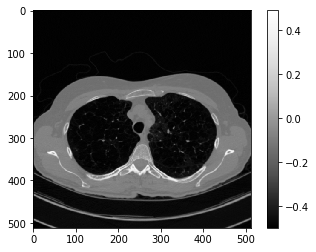

/home/rmoreta/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


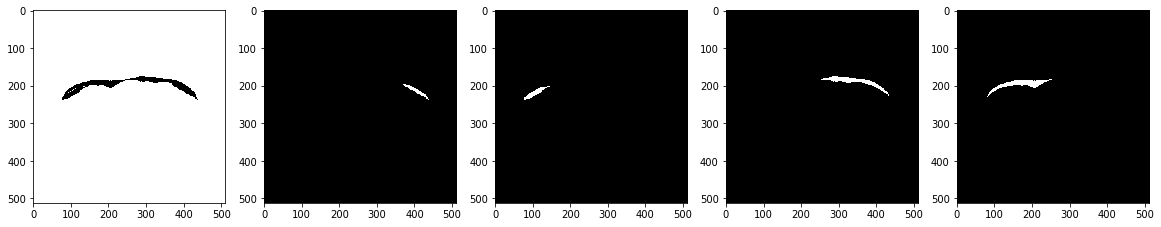

In [8]:
slice_num = 2
channel_num = 0

plt.figure()
plt.imshow(images[slice_num,:,:,channel_num],cmap='Greys_r')
plt.colorbar()
plt.show()

f, a = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    a[i].imshow(labels[slice_num,:,:,i],cmap='Greys_r')
f.show()
plt.draw()

### *Main*

In [9]:
output_path = '/home/rmoreta/Projects/PectoralisSegmentation/Results/'
model_path = '/home/rmoreta/Projects/PectoralisSegmentation/Results/unet_GPU_multiclass_nc5_1400im_24ep_lr001_final.hdf5'

In [10]:
# Creating Netwrok
unet_network = UNETNetwork(architecture_params)

# Creating Engine
unet_engine = Engine(unet_network, output_path)

# Predict
pred_labels = unet_engine.predict_pectoralis(model_database, test_images, model_path=model_path)

2/2 [==============================] - 1s


### *Saving Predictions*

In [ ]:
#data_management.save_labels_as_np(output_path, pred_labels)
#data_management.save_labels_as_nrrd(output_path, pred_labels)

In [19]:
sitk.WriteImage(sitk.GetImageFromArray(test_images), ('output.nrrd'))

-----------

## RESULTS

### *Visualization*

#### Each Class individual

NameError: name 'imgs_mask_test' is not defined

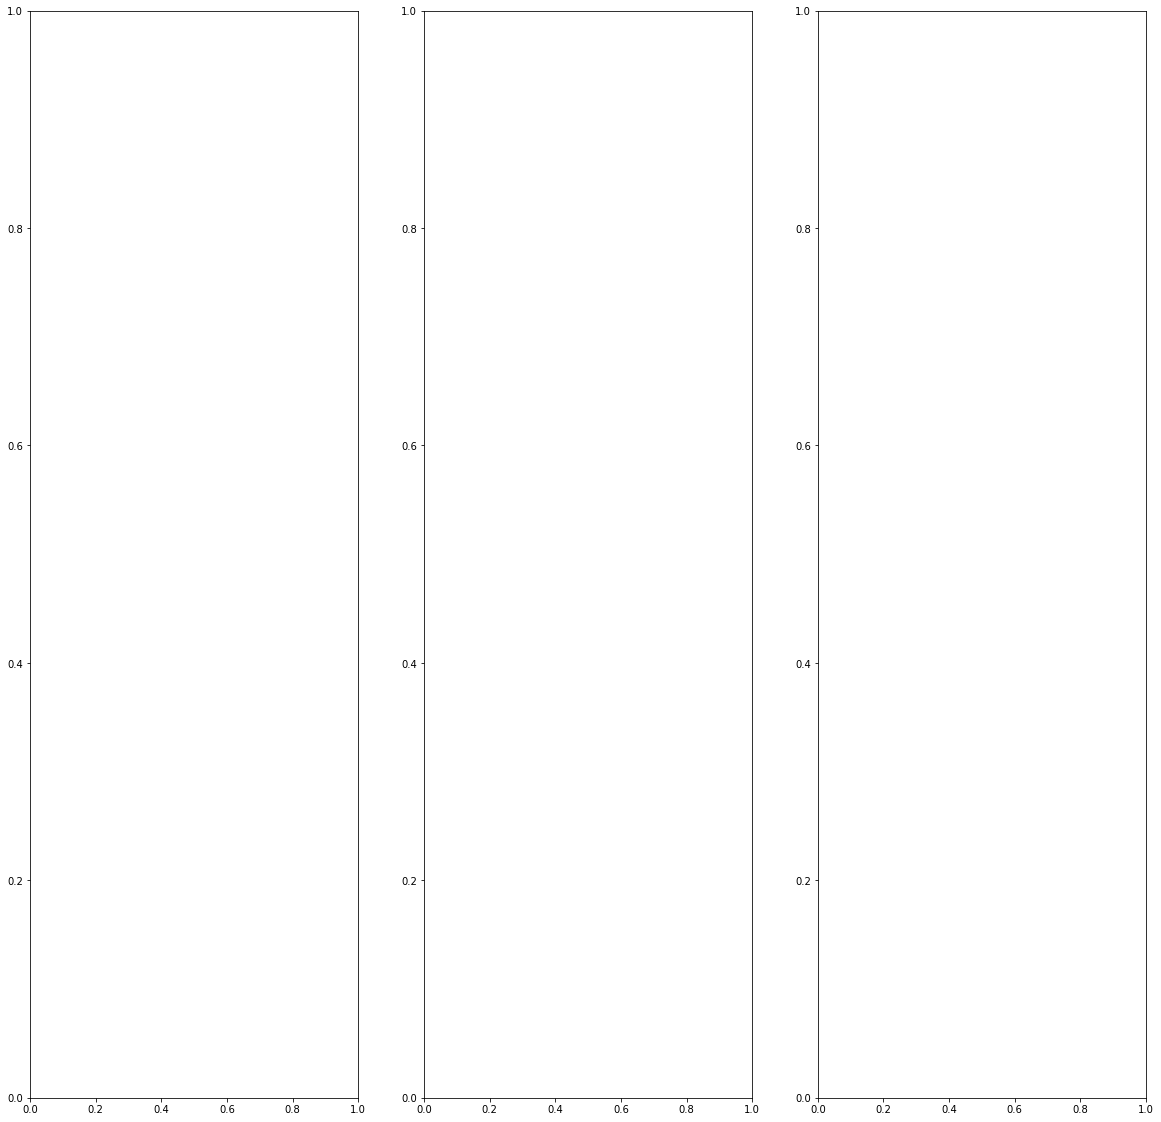

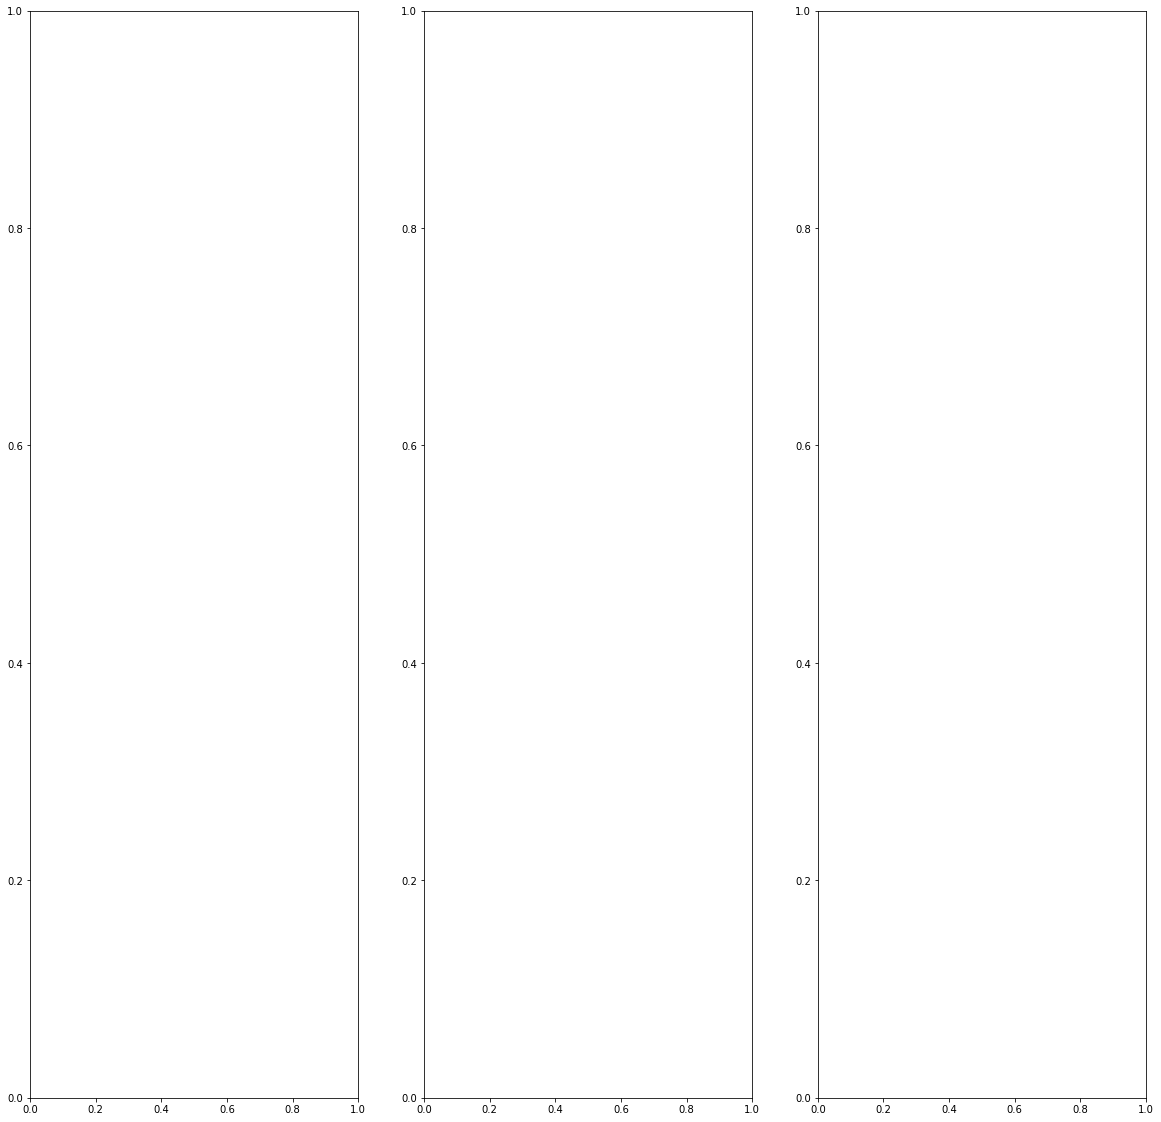

In [15]:
for i in range(3):
    f, a = plt.subplots(1, 3, figsize=(20, 20))
    f2, a2 = plt.subplots(1, 3, figsize=(20, 20))
    a[1].imshow(imgs_mask_test[i,:,:,1], cmap='Greys_r')
    a[2].imshow(imgs_mask_test[i,:,:,2], cmap='Greys_r')
    a[0].imshow(imgs_test[i,:,:,0], cmap='Greys_r')
    a2[0].imshow(pred_labels[i,:,:,0], cmap='Greys_r')
    a2[1].imshow(pred_labels[i,:,:,1], cmap='Greys_r')
    a2[2].imshow(pred_labels[i,:,:,2], cmap='Greys_r')
    f.show()
    f2.show()
    plt.draw()

#### Join all classes

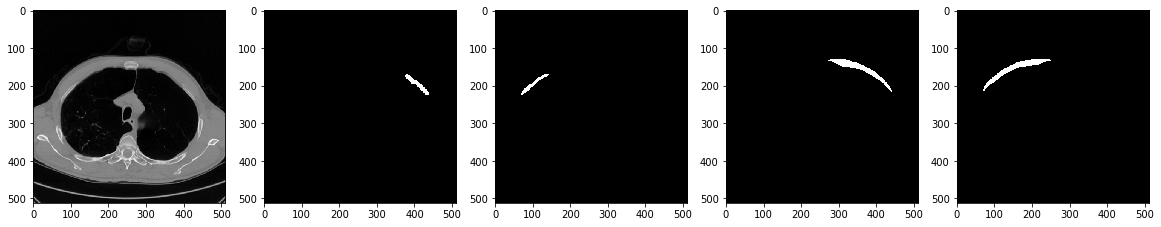

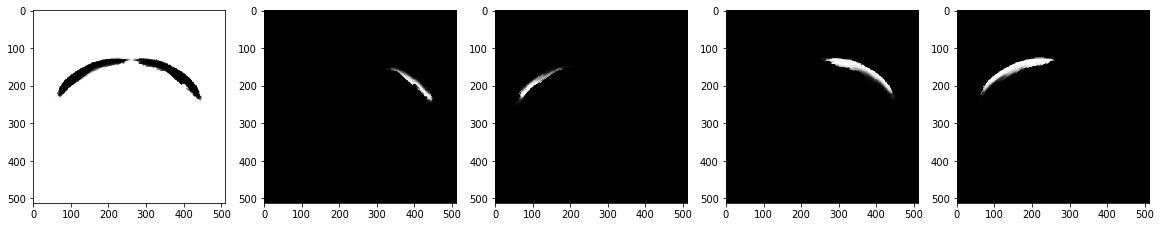

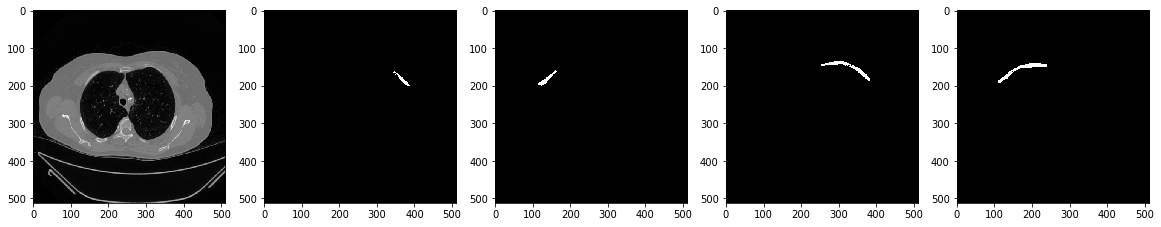

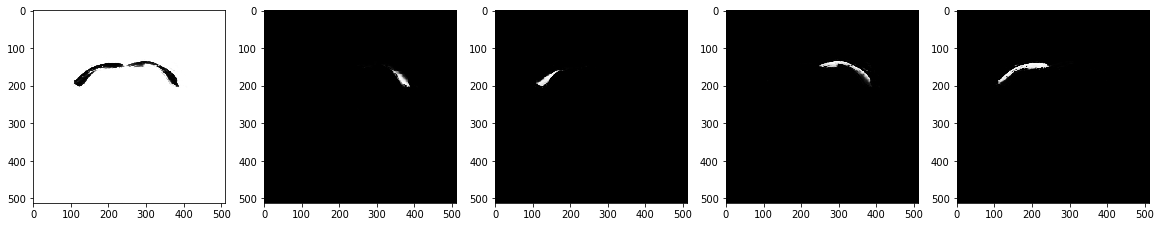

In [17]:
for i in [0,1]:
    f, a = plt.subplots(1, num_classes, figsize=(20, 20))
    f2, a2 = plt.subplots(1, num_classes, figsize=(20, 20))
    a[1].imshow(test_labels[i,:,:,1], cmap='Greys_r')
    a[2].imshow(test_labels[i,:,:,2], cmap='Greys_r')
    a[0].imshow(test_images[i,:,:,0], cmap='Greys_r')
    a[3].imshow(test_labels[i,:,:,3], cmap='Greys_r')
    a[4].imshow(test_labels[i,:,:,4], cmap='Greys_r')
    
    a2[0].imshow(pred_labels[i,:,:,0], cmap='Greys_r')
    a2[1].imshow(pred_labels[i,:,:,1], cmap='Greys_r')
    a2[2].imshow(pred_labels[i,:,:,2], cmap='Greys_r')
    a2[3].imshow(pred_labels[i,:,:,3], cmap='Greys_r')
    a2[4].imshow(pred_labels[i,:,:,4], cmap='Greys_r')
    f.show()
    f2.show()
    plt.draw()

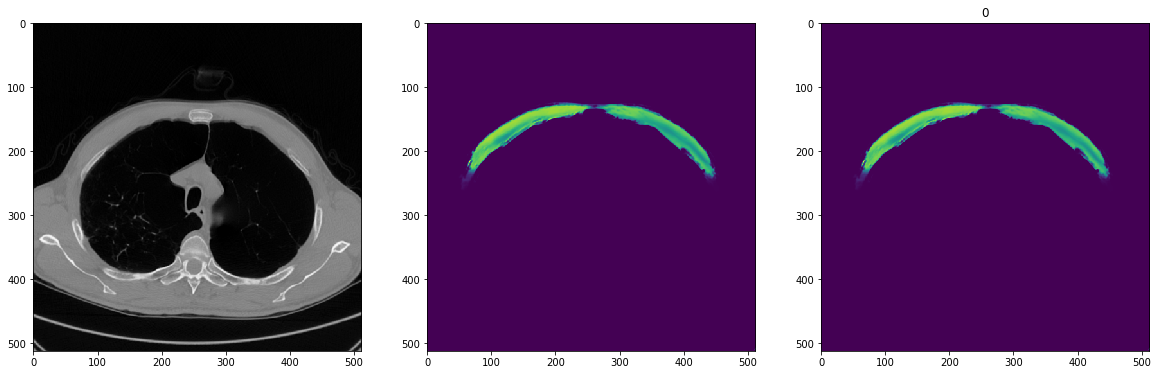

In [14]:
imgs_mask_pred_join = np.copy(pred_labels)
imgs_mask_pred_join[:,:,:,2] = pred_labels[:,:,:,2]*2
imgs_mask_pred_join[:,:,:,3] = pred_labels[:,:,:,3]*3
imgs_mask_pred_join[:,:,:,4] = pred_labels[:,:,:,4]*4
imgs_mask_pred_join = np.sum(pred_labels[:,:,:,1:num_classes], axis = 3)

for i in [0]:
    f, a = plt.subplots(1, 3, figsize=(20, 20))
    a[1].imshow(imgs_mask_pred_join[i,:,:])
    a[2].imshow(imgs_mask_pred_join[i,:,:])
    a[0].imshow(test_images[i,:,:,0],cmap='Greys_r')
    f.show()
    plt.title(str(i))
    plt.draw()
    #plt.savefig('Figures/Multiclass/Best/all_subplot_{}.png'.format(i))
    #scipy.misc.imsave('Figures/Multiclass/Best/all_mask_pred_{}.png'.format(i),imgs_mask_pred[i,:,:,0])
    #scipy.misc.imsave('Figures/Multiclass/Best/all_test_{}.png'.format(i),imgs_mask_test[i,:,:,0])
    #scipy.misc.imsave('Figures/Multiclass/Best/all_mask_test{}.png'.format(i),imgs_test[i,:,:,0])

-----------

### *Statistics*

#### Over Each Image

In [ ]:
def accuracy_IoU_np_individual(y_true, y_pred):
    axis = np.array((1,2))
    tp = np.apply_over_axes(np.sum,(y_true * y_pred), axes=axis)
    fn = np.apply_over_axes(np.sum,((y_true + y_pred)*y_true), axes=axis) - tp*2.
    fp = np.apply_over_axes(np.sum,((y_true + y_pred)*y_pred), axes=axis) - tp*2.
    
    #beta = 1
    #F_b = ((1+np.power(beta,2))*tp)/((1+np.power(beta,2))*tp + np.power(beta,2)*fn + fp)
    IoU = (tp)/(tp + fn + fp)
    
    return IoU

In [ ]:
th = 0.5
pred_labels = np.load('pred_labels.npy')
pred_labels[(pred_labels>th)] = 1
pred_labels[(pred_labels<th)] = 0

acc_test_image = accuracy_IoU_np_individual(test_labels, pred_labels)
print(acc_test_image[1,0,0,:])

## Plot 
images = np.arange(num_images_test)
f, a = plt.subplots(1, num_classes, figsize=(15, 4))
for i in range(num_classes):
    # Class i
    a[i].plot(images,acc_test_image[:,0,0,i], 'o')
    #a[i].xlabel('Test Images')
    #a[i].ylabel(('Accuracy Class ' + str(i)))
    #a[i].title('Accuracy for each Test Image')
    f.show()
    print(('Test Accuracy Class ' + str(i) + ': '), np.mean(acc_test_image[:,0,0,i]))
f.savefig('Figures/Multiclass/c5_accuracy_images.png')

*All Classes*

In [ ]:
images_bad_c = []

for i in range(num_classes):
    condition = acc_test_image[:,0,0,i]<0.1
    images_bad_c = np.where(condition)[0]

# Class 1
condition = acc_test_image[:,0,0,1]<0.1
images_bad_c1 = np.where(condition)[0]
images_bad = np.where(condition)[0]
print(images_bad_c1)

# Class 2
condition = acc_test_image[:,0,0,2]<0.5
images_bad_c2 = np.where(condition)[0]
print(images_bad_c2)
images_bad = np.concatenate((images_bad, images_bad_c2))

# Class 3
condition = acc_test_image[:,0,0,3]<0.07
images_bad_c3 = np.where(condition)[0]
print(images_bad_c3)
images_bad = np.concatenate((images_bad, images_bad_c3))

# Class 4
condition = acc_test_image[:,0,0,4]<0.1
images_bad_c4 = np.where(condition)[0]
print(images_bad_c4)
images_bad = np.concatenate((images_bad, images_bad_c4))

images_bad = np.unique(images_bad)
print(images_bad)

In [ ]:
class_num = 1

condition = acc_test_image[:,0,0,class_num] < 0.1
images_bad_c = np.where(condition)[0]
print(images_bad_c)

*Over All Classes*

In [ ]:
# Images over all classes
acc_test_image_mean = np.mean(acc_test_image,axis=3)
condition = acc_test_image_mean[:,0,0]<0.4
images_bad_classes = np.where(condition)[0]
print(images_bad_classes)

-----------

#### Over all Images

In [ ]:
def accuracy_IoU_np(y_true, y_pred):
    axis = np.array((2,1,0))
    tp = np.apply_over_axes(np.sum,(y_true * y_pred), axes=axis)
    fn = np.apply_over_axes(np.sum,((y_true + y_pred)*y_true), axes=axis) - tp*2.
    fp = np.apply_over_axes(np.sum,((y_true + y_pred)*y_pred), axes=axis) - tp*2.
    
    #beta = 1
    #F_b = ((1+np.power(beta,2))*tp)/((1+np.power(beta,2))*tp + np.power(beta,2)*fn + fp)
    IoU = (tp)/(tp + fn + fp)
    return IoU

In [ ]:
th = 0.5
pred_labels = np.load('pred_labels.npy')
pred_labels[(pred_labels>th)] = 1
pred_labels[(pred_labels<th)] = 0

acc_test = accuracy_IoU_np(test_labels,pred_labels)
acc_test = acc_test[0,0,0,:]

#print(acc_test)
for i in range(num_classes):
    print(('Test Accuracy Class ' + str(i) + ': '), acc_test[i])
print('Test Accuracy Class Mean ', np.mean(acc_test))
print('Test Accuracy Over all ', accuracy_IoU_np_all(imgs_mask_test,imgs_mask_pred))

# PLot
ind = np.arange(num_classes)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, acc_test, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy [%]')
ax.set_title('Accuracy by Class')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'))
plt.show()
#fig.savefig('Figures/Multiclass/c5_accuracy_images_barchar.png')

-----------

-----------

In [ ]:
output_path = '/Users/acil-user/Documents/1 - Rafael Moreta/ProyectBWH/Results/'
image_nrrd = sitk.ReadImage(output_path + 'pred_labels.nrrd')
labels = sitk.GetArrayFromImage(image_nrrd)

LabelToraxSlice = labels[0,:,:]
plt.figure()
plt.imshow(LabelToraxSlice)
plt.colorbar()
plt.show()
print(np.unique(LabelToraxSlice))